# Assignment 7: Linear Model Selection and Regularization

### Student: Rodolfo Lerma

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('House Prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.shape

(1460, 81)

We can see the original data set contains 81 features and 1460 rows.

### Question 1.1: Drop the Id column as it is not needed for prediction

In [3]:
data.drop(columns = 'Id', inplace = True)

## Data Exploration

In [4]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### Missing Values (Columns with the missing more than 50% of the data)

In [5]:
missing_values = []
my_list = data.columns.values.tolist()
y = data.shape
for i in my_list:
    x = data[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

missing_columns_names = []
for key, value in columns_missing.items():
    if value > (data.shape[0])/2.5 : #50% of the data
        x = key
        missing_columns_names.append(x)
print(missing_columns_names)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
data = data.drop(missing_columns_names, axis = 1)
data.shape

(1460, 75)

### Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

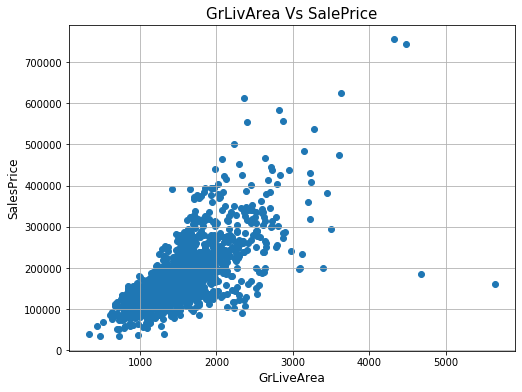

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.title('GrLivArea Vs SalePrice', fontsize = 15)
plt.xlabel('GrLiveArea', fontsize = 12)
plt.ylabel('SalesPrice', fontsize = 12)
plt.grid()
plt.show()

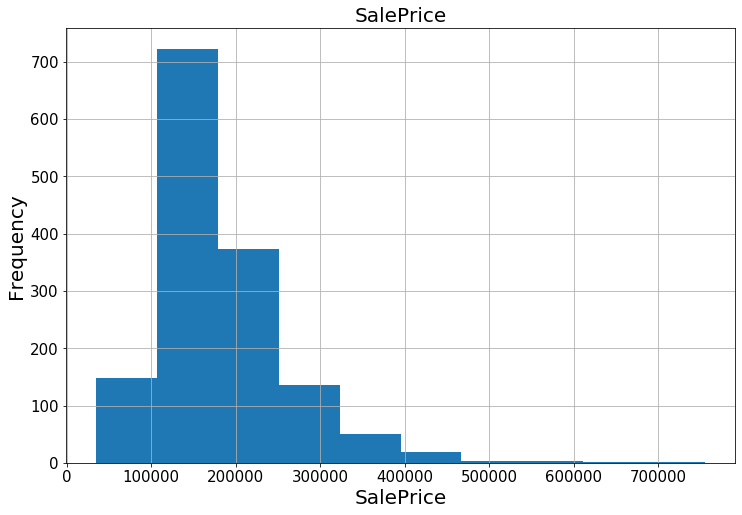

In [8]:
data['SalePrice'].hist(figsize = (12,8))
plt.xlabel('SalePrice', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('SalePrice', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

### Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

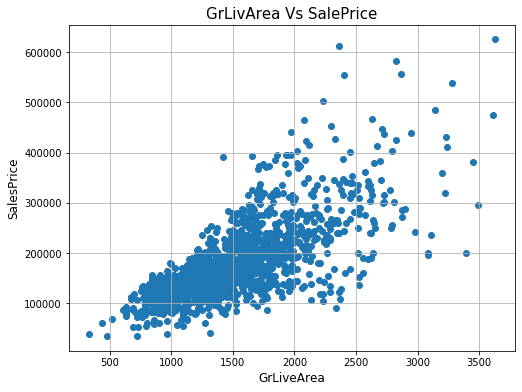

In [9]:
# Remove outliers for data['GrLivArea']>4000
data = data[data['GrLivArea']<4000]

#To Do Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.title('GrLivArea Vs SalePrice', fontsize = 15)
plt.xlabel('GrLiveArea', fontsize = 12)
plt.ylabel('SalesPrice', fontsize = 12)
plt.grid()
plt.show()

### Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API

In [10]:
categorical = []
numerical = []
updated_columns = data.columns.values.tolist()
y = data.shape
for i in updated_columns:
    x = data[i].dtypes
    if x == object:
        categorical.append(i)
    else:
        numerical.append(i)

In [11]:
#To Ensure the columns are in fact numerical values
for i in numerical:
    data[i] = pd.to_numeric(data[i])

In [12]:
data.shape

(1456, 75)

### Experiment to verify would what happens with the NaN by using `get_dummies`

In [13]:
data['GarageCond'].unique()
example = data['GarageCond'].to_frame()

In [14]:
new_example = pd.get_dummies(example)
new_example.head()

,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


As it is possible to see in the example above the `get_dummies` function ignored the NaN values when creating columns.

In [15]:
categorical_data = pd.get_dummies(data[categorical])
categorical_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
categorical_data.shape

(1456, 233)

In [17]:
df = pd.concat([data, categorical_data], axis = 1) 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0


In [18]:
df.shape

(1456, 308)

We can notice that the number of rows in our dataset remained the same and the number of columns is 75 (original set) + 233 (get_dummies) = 308.

In [19]:
#Drop the original categorical variables
df = df.drop(categorical, axis = 1)
df.shape

(1456, 270)

### Question 2.2: Impute missing data by the median of each column.

In [20]:
for i in numerical:
    df[i].fillna(df[i].median(), inplace=True)

### Question 2.2b: Make sure that there are no null values remaining

In [21]:
missing_values = []
my_list = df.columns.values.tolist()
y = df.shape
for i in my_list:
    x = df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

missing_columns_names = []
for key, value in columns_missing.items():
    if value > (df.shape[0])/2.5 : #50% of the data
        x = key
        missing_columns_names.append(x)
print(missing_columns_names)

[]


No columns with missing values were found.

### Final dataset shape

In [22]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### Question 2.3: Generate train test split 70/30. Set random_state=42

**Assumption:**
- There is another unseen data set that will be used for the final Test once the model and hyperparameters are selected thru the train/validation set. This data set is not available on this analysis.

In [23]:
from sklearn.model_selection import train_test_split

my_list.remove('SalePrice')
features = df[my_list]
target = df['SalePrice']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

## NORMALIZATION NEEDED????

### Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [25]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error

#Fit a linear regression model to this data
rm = LinearRegression()

# Fit the data(train the model)
rm.fit(X_train, y_train)

# Predict
y_predicted_train = rm.predict(X_train)
y_predicted_test = rm.predict(X_test)

### Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [26]:
#Compute the RMSE 
import math

def RMSE_performance(X_train, X_test, rm):
    # Predict
    y_predicted_train = rm.predict(X_train)
    y_predicted_test = rm.predict(X_test)

    MSE_train = np.sum(np.square(y_predicted_train - y_train)) / y_train.size
    MSE_test = np.sum(np.square(y_predicted_test - y_test)) / y_test.size

    RMSE_train = math.sqrt(MSE_train)
    RMSE_test = math.sqrt(MSE_test)
    
    return (RMSE_train, RMSE_test)

linear_reg_performance = RMSE_performance(X_train, X_test, rm)
print('RMSE_train: {}'.format(linear_reg_performance[0]))
print('RMSE_test: {}'.format(linear_reg_performance[1]))

RMSE_train: 18355.49191192783
RMSE_test: 23614.207594970678


We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

### Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [27]:
from sklearn import linear_model

#Fit a linear regression model to this data
lasso = Lasso(alpha = 0.000001, max_iter=10000)

# Fit the data(train the model)
lasso.fit(X_train, y_train)

# Predict
y_predicted_train_lasso = rm.predict(X_train)
y_predicted_test_lasso = rm.predict(X_test)

#Compute the RMSE 
lasso_performance = RMSE_performance(X_train, X_test, lasso)
print('RMSE_train: {}'.format(lasso_performance[0]))
print('RMSE_test: {}'.format(lasso_performance[1]))

RMSE_train: 18355.491911927846
RMSE_test: 23685.269800758728


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85331254418.72969, tolerance: 634515517.391386
  positive)


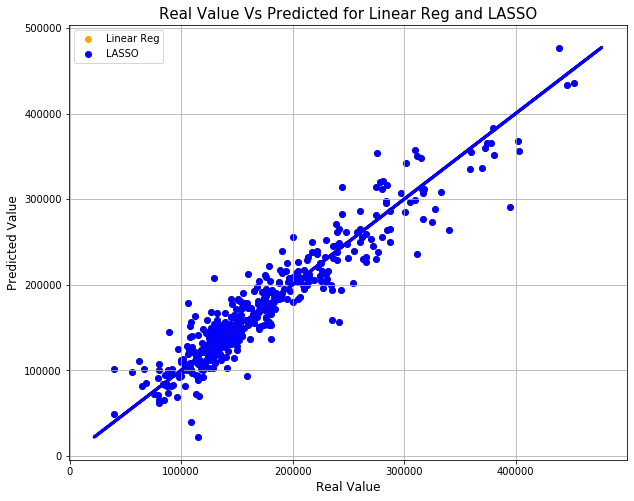

In [28]:
#To Do Create a scatter plot
plt.figure(figsize=(10, 8)).gca()

#Linear Regression
plt.scatter(y_test, y_predicted_test, label = 'Linear Reg', color="orange")
plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'red')

#LASSO
plt.scatter(y_test, y_predicted_test_lasso, label = 'LASSO', color="blue")
plt.plot(y_predicted_test_lasso, y_predicted_test_lasso, linewidth=3, color="blue")

#General 
plt.title('Real Value Vs Predicted for Linear Reg and LASSO', fontsize = 15)
plt.xlabel('Real Value', fontsize = 12)
plt.ylabel('Predicted Value', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

In [29]:
#Comparison in performance
print('RMSE_test_linear_reg: {}'.format(linear_reg_performance[1]))
print('RMSE_test_lasso: {}'.format(lasso_performance[1]))

RMSE_test_linear_reg: 23614.207594970678
RMSE_test_lasso: 23685.269800758728


Both points and lines superposed each other, showing that with an `alpha` value as small as the one chosen for this analysis both models lead to the same answers.

### Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

In [30]:
alpha_vals = np.arange(0.01, 50, 0.1) # values of alpha we want to iterate over
coefficients = []
RMSE_train = []
RMSE_test = []
flag = 0
number = []

for i in alpha_vals:
    flag += 1 #Counter
    #Fit a linear regression model to this data
    model = Lasso(alpha = i, max_iter=100000, normalize = True)
    
    # Fit the data(train the model)
    model.fit(X_train, y_train)
    
    coefficients_i = model.coef_

    # Predict
    y_predicted_train_model = model.predict(X_train)
    y_predicted_test_model = model.predict(X_test)
    
    #Compute the RMSE 
    lasso_performance = RMSE_performance(X_train, X_test, model)
    RMSE_train_i = lasso_performance[0]
    RMSE_test_i = lasso_performance[1]
    
    RMSE_train.append(RMSE_train_i)
    RMSE_test.append(RMSE_test_i)
    coefficients.append(coefficients_i)
    number.append(flag)    

# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)

### Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

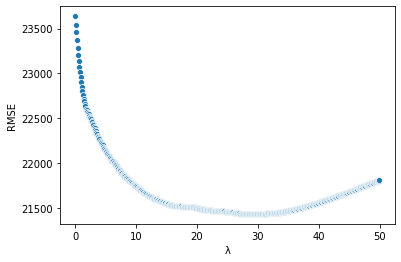

In [31]:
sns.scatterplot(x='λ', y='RMSE', data=pd.DataFrame({'λ': alpha_vals, 'RMSE': RMSE_test}));

In [32]:
performance_data= pd.DataFrame({'alpha': alpha_vals, 'RMSE_Test': RMSE_test, 'RMSE_Train' : RMSE_train})
performance_data.head()

,alpha,RMSE_Test,RMSE_Train
0,0.01,23637.810154,18355.511109
1,0.11,23544.146257,18357.814401
2,0.21,23457.476536,18360.357130
3,0.31,23370.934939,18365.063659
4,0.41,23285.590144,18370.197259


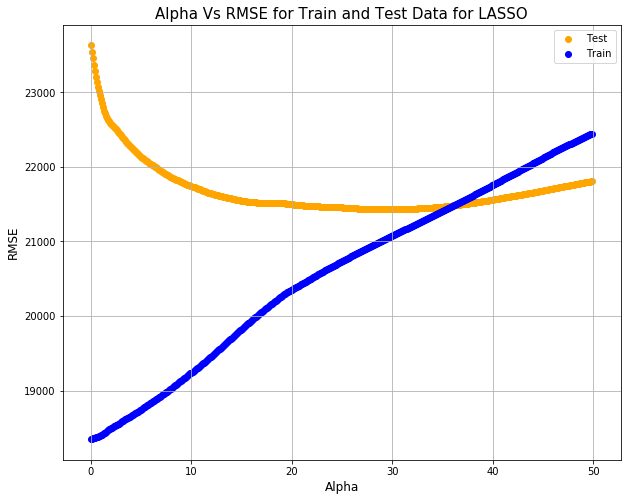

In [33]:
#To Do Create a scatter plot
plt.figure(figsize=(10, 8)).gca()

#Linear Regression
plt.scatter(performance_data['alpha'], performance_data['RMSE_Test'], label = 'Test', color="orange")
#plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'red')

#LASSO
plt.scatter(performance_data['alpha'], performance_data['RMSE_Train'], label = 'Train', color="blue")

#General 
plt.title('Alpha Vs RMSE for Train and Test Data for LASSO', fontsize = 15)
plt.xlabel('Alpha', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

### Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

In [34]:
coefficients[0][0]

-50.72346288861655

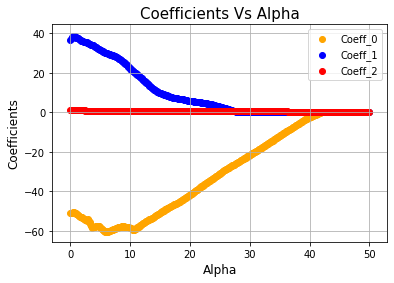

In [35]:
#Example of some of the coefficients (just 3), but not all the 270 Coefficients

coeff_0 = []
coeff_1 = []
coeff_2 = []

for i in range(len(alpha_vals)):
    coeffs = coefficients[i][0]
    coeffs1 = coefficients[i][1]
    coeffs2 = coefficients[i][2]
    coeff_0.append(coeffs)
    coeff_1.append(coeffs1)
    coeff_2.append(coeffs2)
    
#Plots
plt.scatter(alpha_vals, coeff_0, label = 'Coeff_0', color="orange")
plt.scatter(alpha_vals, coeff_1, label = 'Coeff_1', color="blue")
plt.scatter(alpha_vals, coeff_2, label = 'Coeff_2', color="red")

#General 
plt.title('Coefficients Vs Alpha', fontsize = 15)
plt.xlabel('Alpha', fontsize = 12)
plt.ylabel('Coefficients', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

### Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

In [37]:
alpha_vals = np.arange(0.1, 200, 1)

In [38]:
# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)
coefficients = []
RMSE_train = []
RMSE_test = []
flag = 0
number = []

for i in alpha_vals:
    flag += 1 #Counter
    #Fit a linear regression model to this data
    model = Ridge(alpha = i, max_iter=100000, normalize = True)
    
    # Fit the data(train the model)
    model.fit(X_train, y_train)
    
    coefficients_i = model.coef_

    # Predict
    y_predicted_train_model = model.predict(X_train)
    y_predicted_test_model = model.predict(X_test)
    
    #Compute the RMSE 
    lasso_performance = RMSE_performance(X_train, X_test, model)
    RMSE_train_i = lasso_performance[0]
    RMSE_test_i = lasso_performance[1]
    
    RMSE_train.append(RMSE_train_i)
    RMSE_test.append(RMSE_test_i)
    coefficients.append(coefficients_i)
    number.append(flag)    

### Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

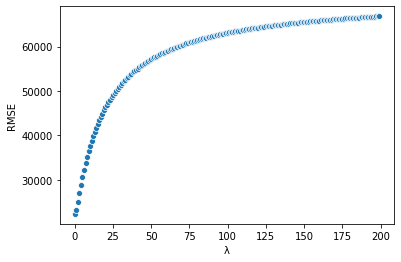

In [39]:
sns.scatterplot(x='λ', y='RMSE', data=pd.DataFrame({'λ': alpha_vals, 'RMSE': RMSE_test}));

In [40]:
performance_data= pd.DataFrame({'alpha': alpha_vals, 'RMSE_Test': RMSE_test, 'RMSE_Train' : RMSE_train})
performance_data.head()

,alpha,RMSE_Test,RMSE_Train
0,0.1,22312.776173,18993.955499
1,1.1,23197.990292,23455.451817
2,2.1,25019.862197,26892.458706
3,3.1,26938.628012,29820.250285
4,4.1,28797.097639,32372.890867


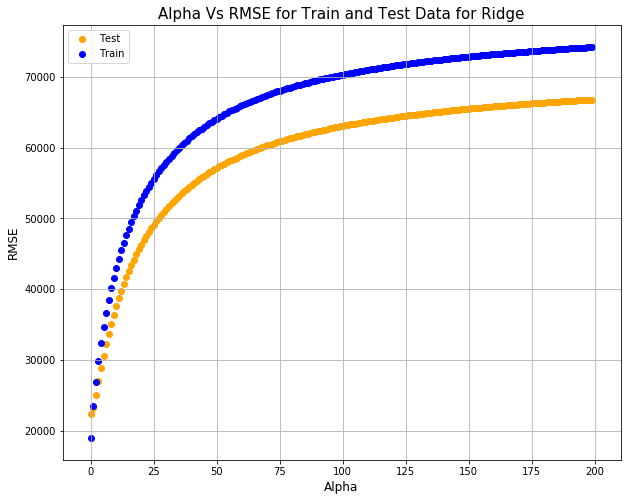

In [41]:
#To Do Create a scatter plot
plt.figure(figsize=(10, 8)).gca()

#Linear Regression
plt.scatter(performance_data['alpha'], performance_data['RMSE_Test'], label = 'Test', color="orange")
#plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'red')

#LASSO
plt.scatter(performance_data['alpha'], performance_data['RMSE_Train'], label = 'Train', color="blue")

#General 
plt.title('Alpha Vs RMSE for Train and Test Data for Ridge', fontsize = 15)
plt.xlabel('Alpha', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

### Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

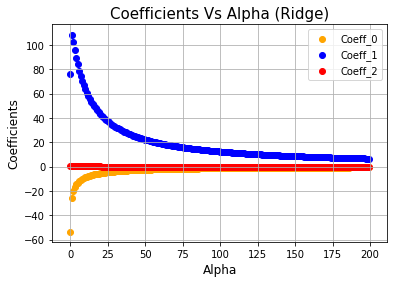

In [42]:
#Example of some of the coefficients (just 3), but not all the 270 Coefficients
coeff_0 = []
coeff_1 = []
coeff_2 = []

for i in range(len(alpha_vals)):
    coeffs = coefficients[i][0]
    coeffs1 = coefficients[i][1]
    coeffs2 = coefficients[i][2]
    coeff_0.append(coeffs)
    coeff_1.append(coeffs1)
    coeff_2.append(coeffs2)
    
#Plots
plt.scatter(alpha_vals, coeff_0, label = 'Coeff_0', color="orange")
plt.scatter(alpha_vals, coeff_1, label = 'Coeff_1', color="blue")
plt.scatter(alpha_vals, coeff_2, label = 'Coeff_2', color="red")

#General 
plt.title('Coefficients Vs Alpha (Ridge)', fontsize = 15)
plt.xlabel('Alpha', fontsize = 12)
plt.ylabel('Coefficients', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

### Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

In [43]:
alpha_vals = np.arange(0.1, 200, 1)

# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)
coefficients = []
RMSE_train = []
RMSE_test = []
flag = 0
number = []

for i in alpha_vals:
    flag += 1 #Counter
    #Fit a linear regression model to this data
    model = ElasticNet(alpha = i, max_iter=100000, normalize = True)
    
    # Fit the data(train the model)
    model.fit(X_train, y_train)
    
    coefficients_i = model.coef_

    # Predict
    y_predicted_train_model = model.predict(X_train)
    y_predicted_test_model = model.predict(X_test)
    
    #Compute the RMSE 
    lasso_performance = RMSE_performance(X_train, X_test, model)
    RMSE_train_i = lasso_performance[0]
    RMSE_test_i = lasso_performance[1]
    
    RMSE_train.append(RMSE_train_i)
    RMSE_test.append(RMSE_test_i)
    coefficients.append(coefficients_i)
    number.append(flag)    

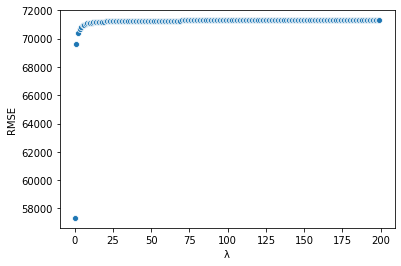

In [44]:
sns.scatterplot(x='λ', y='RMSE', data=pd.DataFrame({'λ': alpha_vals, 'RMSE': RMSE_test}));

In [45]:
performance_data= pd.DataFrame({'alpha': alpha_vals, 'RMSE_Test': RMSE_test, 'RMSE_Train' : RMSE_train})
performance_data.head()

,alpha,RMSE_Test,RMSE_Train
0,0.1,57329.262847,64325.125706
1,1.1,69627.388496,77158.609374
2,2.1,70417.791149,77978.990431
3,3.1,70704.331801,78276.306525
4,4.1,70852.359128,78429.881757


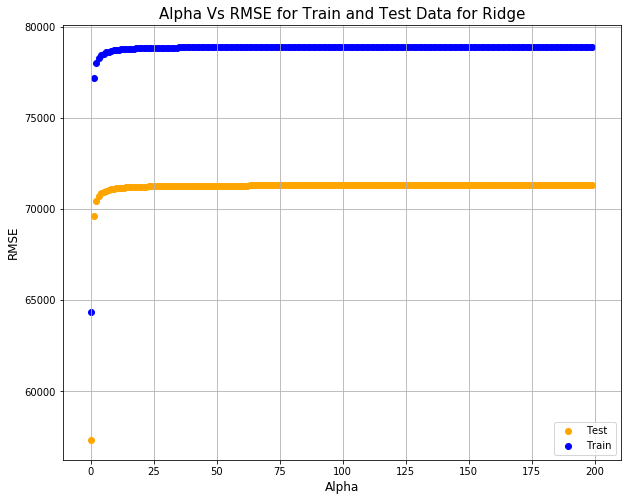

In [46]:
#To Do Create a scatter plot
plt.figure(figsize=(10, 8)).gca()

#Linear Regression
plt.scatter(performance_data['alpha'], performance_data['RMSE_Test'], label = 'Test', color="orange")
#plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'red')

#LASSO
plt.scatter(performance_data['alpha'], performance_data['RMSE_Train'], label = 'Train', color="blue")

#General 
plt.title('Alpha Vs RMSE for Train and Test Data for Ridge', fontsize = 15)
plt.xlabel('Alpha', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

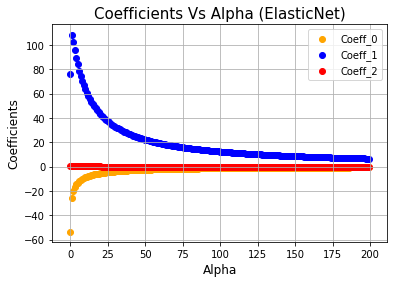

In [47]:
#Plots
plt.scatter(alpha_vals, coeff_0, label = 'Coeff_0', color="orange")
plt.scatter(alpha_vals, coeff_1, label = 'Coeff_1', color="blue")
plt.scatter(alpha_vals, coeff_2, label = 'Coeff_2', color="red")

#General 
plt.title('Coefficients Vs Alpha (ElasticNet)', fontsize = 15)
plt.xlabel('Alpha', fontsize = 12)
plt.ylabel('Coefficients', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

### Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge`, `Lasso`, anf `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.

### Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

- What was your incoming experience with this model, if any? 
- What steps you took, what obstacles you encountered. 
- How you link this exercise to real-world, machine learning problem-solving. (What steps were missing? 
- What else do you need to learn?